In [24]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re

import tensorflow as tf

from utils import below_threshold_len

In [ ]:
# load preprocessed amazon review dataset from directory
train_data = pd.read_csv("/home/masang/Desktop/Quest02/data/preprocessed_normal.csv")
normal_data = pd.read_csv("/home/masang/Desktop/Quest02/data/preprocessed_test.csv")
print('전체 샘플수 :', (len(test_data)))

전체 샘플수 : 499


텍스트의 최소 길이 : 9
텍스트의 최대 길이 : 239
텍스트의 평균 길이 : 60.26807072282892


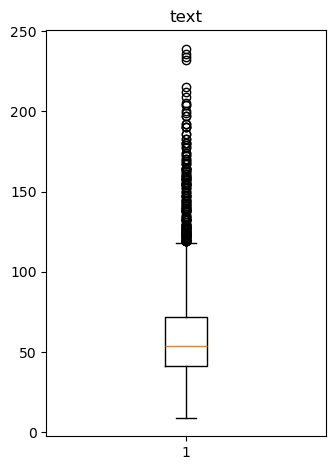

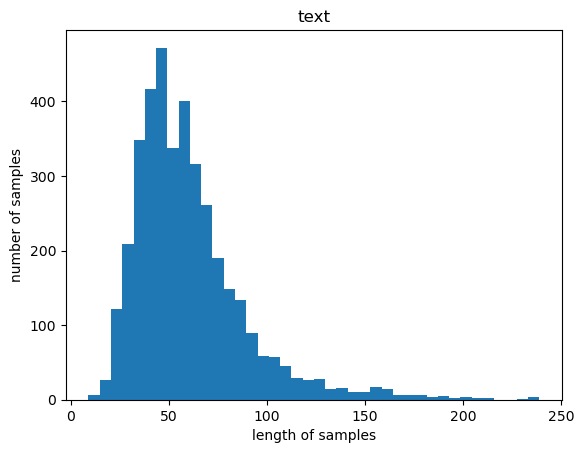

In [4]:
text_len = [len(s.split()) for s in train_data['conversation']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('text')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [5]:
# mean + 2*std를 텍스트 길이의 상한선으로 설정 -> 손실되는 text 5% 미만
text_max_len = int(np.mean(text_len) + 2 * np.std(text_len))
print(text_max_len)

117


In [6]:
below_threshold_len(text_max_len, train_data['conversation'])
below_threshold_len(text_max_len, test_data['text'])

전체 샘플 중 길이가 117 이하인 샘플의 비율: 0.9521580863234529
전체 샘플 중 길이가 117 이하인 샘플의 비율: 0.9599198396793587


In [7]:
train_data = train_data[train_data["conversation"].apply(lambda x: len(x.split()) <= text_max_len)]
test_data = test_data[test_data["text"].apply(lambda x: len(x.split()) <= text_max_len)]

print('전체 학습 샘플수 :', (len(train_data)))
print('전체 테스트 샘플수 :', (len(test_data)))

전체 학습 샘플수 : 3662
전체 테스트 샘플수 : 479


In [8]:
label_mapping = {
    '협박 대화': 0,
    '기타 괴롭힘 대화': 1,
    '직장 내 괴롭힘 대화': 2,
    '갈취 대화': 3
}

train_data['class'] = train_data['class'].map(label_mapping)

In [9]:
x_train = np.array(train_data['conversation'])
y_train = np.array(train_data['class'])

x_test = np.array(test_data['text'])

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [11]:
print('훈련 데이터의 개수 :', len(x_train))
print('훈련 레이블의 개수 :', len(x_val))
print('테스트 데이터의 개수 :', len(y_train))
print('테스트 레이블의 개수 :', len(y_val))

훈련 데이터의 개수 : 2929
훈련 레이블의 개수 : 733
테스트 데이터의 개수 : 2929
테스트 레이블의 개수 : 733


In [12]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(x_train)

In [13]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 21446
등장 빈도가 2번 이하인 희귀 단어의 수: 15341
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 6105
단어 집합에서 희귀 단어의 비율: 71.5331530355311
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 11.299528345170586


In [14]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=6000)
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_val)

In [15]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
x_train_tk = tokenizer.texts_to_sequences(x_train)
x_val_tk = tokenizer.texts_to_sequences(x_val)
x_test_tk = tokenizer.texts_to_sequences(x_val)

# 잘 진행되었는지 샘플 출력
print(x_train_tk[:3])

[[9, 201, 412, 154, 22, 27, 495, 192, 10, 495, 25, 1060, 18, 1980, 5, 718, 964, 495, 211, 20, 6, 53, 770, 229, 1101, 1, 9, 1404, 15, 1231, 2260, 580, 301, 30, 132, 5527, 1404, 192, 132, 496, 10, 4506, 3361, 3, 719, 209, 318, 720, 8, 3, 5528, 20, 290, 53, 770, 32, 222, 3, 163, 18, 771, 1472, 3362, 73, 4, 280, 37, 1102, 524, 201, 67, 17, 5529, 233, 2261, 154, 22], [86, 636, 22, 2099, 1733, 404, 1473, 23, 80, 67, 1144, 294, 108, 17, 76, 1, 18, 67, 3026, 1838, 162, 302, 294, 51, 115, 3027, 224, 303, 3363, 294, 1734, 25, 2100, 362, 21, 2462, 115, 1558, 10, 18, 40, 164, 325, 183, 48, 17, 92, 14, 46, 237, 93, 30, 1633, 404, 17, 497], [1, 18, 11, 138, 772, 20, 138, 12, 158, 12, 1, 645, 267, 15, 43, 5530, 645, 267, 348, 27, 13, 8, 214, 93, 1145, 1634, 185, 20, 749, 2262, 2262, 2711, 47, 48, 11, 138, 12, 884, 27, 13, 171, 3, 69, 993, 1187, 348, 19, 47, 32, 8, 214, 1146, 4507, 94, 138, 813, 70, 15, 2712, 1102, 97, 138, 75, 190, 177]]


In [16]:
x_train_tk = tf.keras.utils.pad_sequences(x_train_tk, maxlen=text_max_len, padding='post')
x_val_tk = tf.keras.utils.pad_sequences(x_val_tk, maxlen=text_max_len, padding='post')
x_test_tk = tf.keras.utils.pad_sequences(x_test_tk, maxlen=text_max_len, padding='post')

In [17]:
print(x_test_tk.shape)

(733, 117)


In [18]:
vocab_size = 6000    # 어휘 사전의 크기입니다(3~9999의 인덱스 범위)
embed_dim = 256  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# lstm model
lstm = tf.keras.Sequential()
lstm.add(tf.keras.layers.Embedding(vocab_size, embed_dim, input_shape=(None,)))
lstm.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
lstm.add(tf.keras.layers.Dense(64, activation='relu'))
lstm.add(tf.keras.layers.Dense(4, activation='softmax'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

lstm.summary()

/home/masang/anaconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1739932375.578993   49994 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739932375.613149   49994 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739932375.614866   49994 cuda_executor.cc:1015] successful NUMA node rea

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, None, 256)      │     1,536,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,708,868 (6.52 MB)

 Trainable params: 1,708,868 (6.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("models/.weights.h5", 
                             monitor='val_accuracy', 
                             verbose=1,
                             save_best_only=True,
                             mode='max', 
                             save_weights_only=True)

In [20]:
lstm.compile(optimizer=tf.keras.optimizers.Adam(0.0002),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 50

history = lstm.fit(x_train_tk,
                    y_train,
                    epochs=epochs,
                    batch_size=256,
                    validation_data=(x_val_tk, y_val),
                    verbose=1,
                    callbacks=[checkpoint])

Epoch 1/50


2025-02-19 11:32:57.645586: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2478 - loss: 1.3857
Epoch 1: val_accuracy improved from -inf to 0.35334, saving model to models/.weights.h5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2552 - loss: 1.3846 - val_accuracy: 0.3533 - val_loss: 1.3756
Epoch 2/50
 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3868 - loss: 1.3717 
Epoch 2: val_accuracy improved from 0.35334 to 0.45703, saving model to models/.weights.h5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3867 - loss: 1.3698 - val_accuracy: 0.4570 - val_loss: 1.3574
Epoch 3/50
 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5325 - loss: 1.3468 
Epoch 3: val_accuracy improved from 0.45703 to 0.60573, saving model to models/.weights.h5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5466 - loss: 1.3430 - val_accuracy: 0.6057 - val_loss: 1.3222
Epoch 4/50
 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6927 - loss: 1.3007 
Epoch 4: val_accuracy improved from 0.60573 to 0.66030